# Must Run

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import geopy.distance
import seaborn as sns
import glob
import os
import scipy as sci
import scipy.signal as sig
import scipy.spatial as spa
import scipy.stats as stat
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)

ex = './Historical Data/%s.csv'
path = ex % 'LCM'
!wc -1 $psth

wc: illegal option -- 1
usage: wc [-clmw] [file ...]


# Bird

In [334]:
#upload pollen dataset as csv
pmm = pd.read_csv('/Users/athenaye/Downloads/Partial Migration in the Mediterranean storm petrel (BirdLife Malta).csv')

#make columns manageable
pmm['timestamp'] =  pd.to_datetime(pmm['timestamp'])
pmm['Date'] = pmm['timestamp'].dt.date
pmm['Time'] = pmm['timestamp'].dt.time
pmm['Coordinates']  = list(zip(pmm['location-lat'], pmm['location-long']))

#drop unwanted columns and Na
smallpmm = pmm.drop(labels=['event-id', 'visible', 'timestamp',
       'bas:confidence', 'end-timestamp', 'geolocator-fix-type',
       'gls:light-level', 'manually-marked-outlier', 'start-timestamp',
       'sensor-type', 'individual-taxon-canonical-name', 'individual-local-identifier', 'study-name', 'Coordinates'], axis = 1)
smallpmmnumbers = smallpmm.dropna()
smallpmmnumbers['Coordinates']  = list(zip(smallpmmnumbers['location-lat'], smallpmmnumbers['location-long']))
indexedpmm = smallpmmnumbers.set_index(['tag-local-identifier'])

FileNotFoundError: [Errno 2] No such file or directory: 'User/Documents/GitHub/Historical-Data/Data/Partial Migration in the Mediterranean storm petrel (BirdLife Malta).csv'

In [196]:
#Make a dataset for animal 659
sixfivenine = pd.DataFrame()
for x in range(len(indexedpmm.index)):
    if indexedpmm.index[x] == 'Z659':
        sixfivenine = pd.concat([sixfivenine, indexedpmm.iloc[x]], axis = 1)
sixfivenine = sixfivenine.T
sixfivenine['Date'] = pd.to_datetime(sixfivenine['Date'])
sixfivenine = sixfivenine.set_index('Date')
sixfivenine['location-longint'] = sixfivenine['location-long'].astype(str).astype(float)
sixfivenine['location-latint'] = sixfivenine['location-lat'].astype(str).astype(float)

In [215]:
#Make a plot for distance per day
distperdayarr = np.empty(len(groupedsixfivenine))
for x in range(len(groupedsixfivenine)):
    coord1 = groupedsixfivenine['MeanCoordinates'].iloc[x]
    coord2 = groupedsixfivenine['MeanCoordinates'].iloc[x-1]
    distperdayarr[x] = geopy.distance.distance(coord1, coord2).km
distperday = pd.DataFrame(distperdayarr)
distperday = distperday.set_index(groupedsixfivenine.index)
plt.plot(distperday)

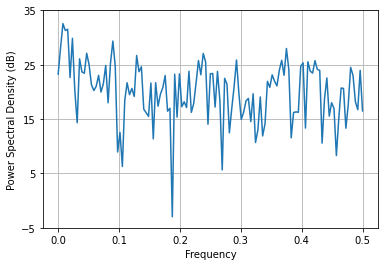

In [301]:
#PSD of distance per day with an NFFT of 2^8, with plt.psd() detrending the data
a, b = plt.psd(distperday, Fs = 1, scale_by_freq = False, NFFT = 2**8, detrend = 'linear')
distperdaydataarg = a
distperdayindexarg = b
zdistperdayinmeeting = stat.zscore(distperdaydataarg)

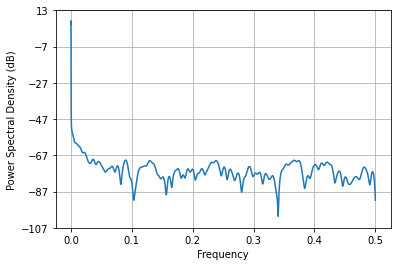

In [302]:
#PSD of distance per day with an NFFT of 2^14, with plt.psd() detrending the data
a, b = plt.psd(distperday, Fs = 1, scale_by_freq = False, NFFT = 2**14, detrend = 'linear')

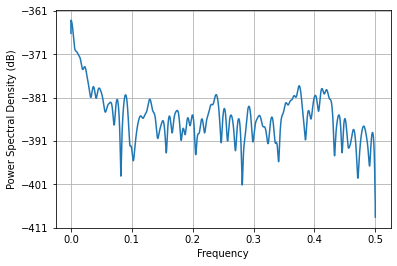

In [253]:
#PSD of distance per day with an NFFT of 2^14, with sig.detrend() detrending the data
a, b = plt.psd(dtdistperday, Fs = 1, scale_by_freq = False, NFFT = 2**14)

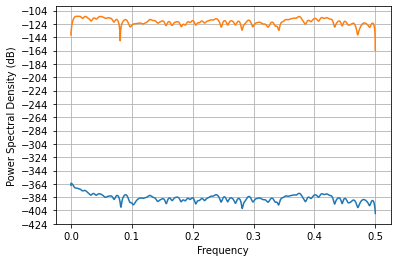

In [220]:
#Detrending distance per day with sig.detrend()
dtdistperday = sig.detrend(distperday)
dtdistperday = pd.DataFrame(dtdistperday)
dtadistperday,dtbdistperday = plt.psd(dtdistperday, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue

#Z-scored data of dist per day with sig.detrend()
zdistperday = stat.zscore(dtdistperday)
zdistperday = pd.DataFrame(zdistperday)
zadistperday,zbdistperday = plt.psd(zdistperday, Fs = 1, scale_by_freq = False, NFFT = 2**14 )

# Pollen

In [305]:
pollen = pd.read_csv('/Users/athenaye/Downloads/pollen.csv', index_col = 'Date')
pollen = pollen.sort_index()
simple = pollen.set_index(np.array(range(0,7784)))

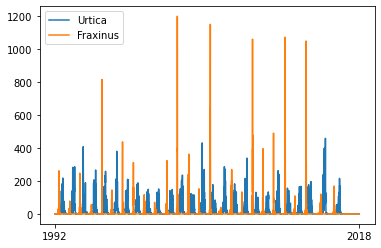

In [306]:
#plotting two very different pollen genuses
plt.plot(simple['Urtica'])
plt.plot(simple['Fraxinus'])
plt.xticks((0,7784), (1992,2018))
plt.legend(('Urtica','Fraxinus'), loc="upper left")

([<matplotlib.axis.XTick at 0x7ff5628e0280>,
 [Text(0, 0, '1992'), Text(7784, 0, '2018')])

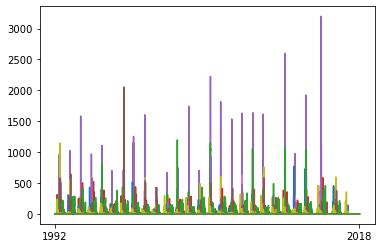

In [308]:
#Pollen Graph
plt.plot(simple)
plt.xticks((0,7784), (1992,2018))

In [149]:
#Pollen Mean
pollenmean=pollen.mean(axis=(1))
pollenmean

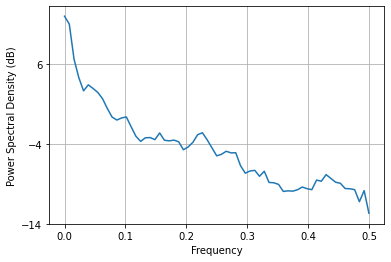

In [303]:
#PSD of pollen mean with an NFFT of 2^7
a, b = plt.psd(pollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**7)

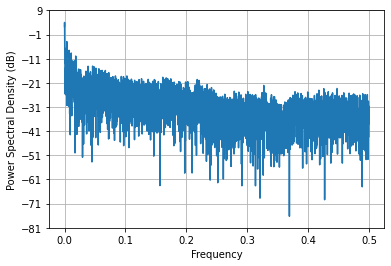

In [150]:
#PSD of pollen mean with an NFFT of 2^14
a, b = plt.psd(pollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**14)
pollenmeandata = a
pollenmeanindex = b

### Detrended and Z-Score  Pollen

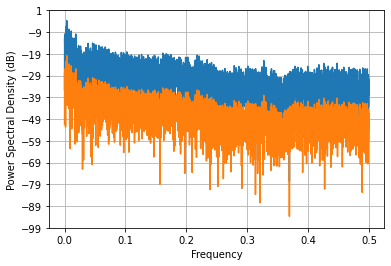

In [151]:
dtpollenmean = sig.detrend(pollenmean)
dtpollenmean = pd.DataFrame(dtpollenmean)
dtapollenmean,dtbpollenmean = plt.psd(dtpollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue
zpollenmean = stat.zscore(dtpollenmean)
zpollenmean = pd.DataFrame(zpollenmean)
zapollenmean,zbpollenmean = plt.psd(zpollenmean, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in orange

## All Pollen

In [309]:
urtica = simple['Urtica']
frax = simple['Fraxinus']

7784


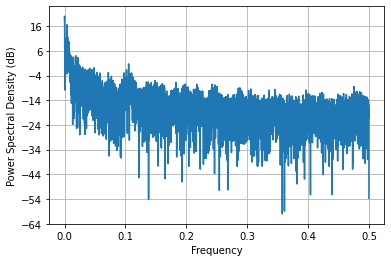

In [310]:
#PSD of Urtica
a, b = plt.psd(urtica, Fs = 1, scale_by_freq = False, NFFT = 2**14)
urticadata = a
urticaindex = b

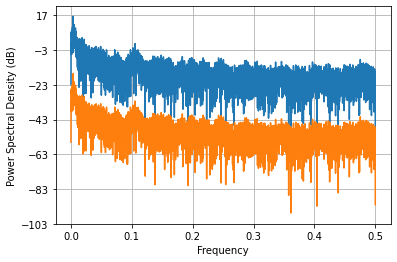

In [119]:
#Detrended Urtica
dturtica = sig.detrend(urtica)
dturtica = pd.DataFrame(dturtica)
dtaurtica,dtburtica = plt.psd(dturtica, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue

#Z-scored Urtica
zurtica = stat.zscore(dturtica)
zurtica = pd.DataFrame(zurtica)
zaurtica,zburtica = plt.psd(zurtica, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in orange

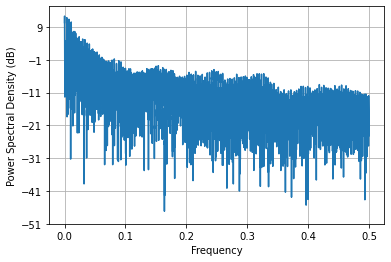

In [120]:
#PSD of frax
a, b = plt.psd(frax, Fs = 1, scale_by_freq = False, NFFT = 2**14)
fraxdata = a
fraxindex = b

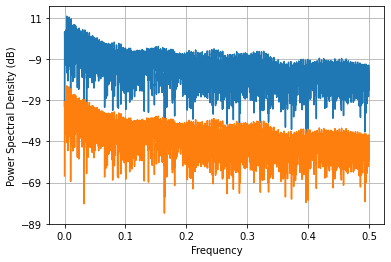

In [125]:
#Detrended Urtica
dtfrax = sig.detrend(frax)
dtfrax = pd.DataFrame(dtfrax)
dtafrax,dtbfrax = plt.psd(dtfrax, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in blue

#Z-scored Urtica
zfrax = stat.zscore(dtfrax)
zfrax = pd.DataFrame(zfrax)
zafrax,zbfrax = plt.psd(zfrax, Fs = 1, scale_by_freq = False, NFFT = 2**14 ) #in orange

# AWND

In [24]:
years = []
stationlist = ['AQW00061705', 'FMW00040308','GQW00041415', 'RQW00011641', 'USC00244558']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'AWND'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
awndoverall = ultimate.sort_values(by='date')

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


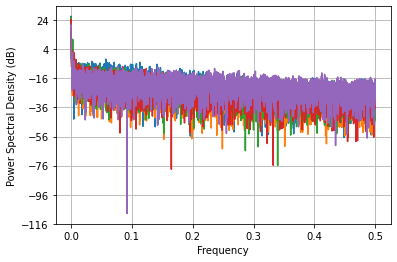

In [26]:
for x in range(len(awndoverall.columns)):
    nonan = awndoverall[awndoverall.columns[x]]
    nonan = nonan.interpolate('linear')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
aawndmean = acumulative.mean(axis=(0))
bawndmean = bcumulative.mean(axis=(0))

### Detrended

In [313]:
dtawnd = pd.DataFrame()
zawnd = pd.DataFrame()
for x in range(len(awndoverall.columns)):
    dtnonan = awndoverall[awndoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zawnd = pd.concat([zawnd, zscore], axis = 1)
    dtawnd = pd.concat([dtawnd, detrend], axis = 1)

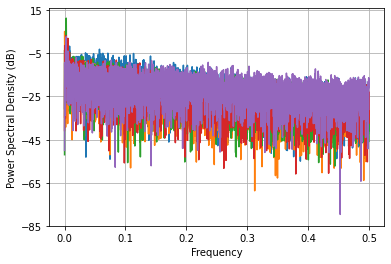

In [314]:
for x in range(len(dtawnd.columns)):
    dtnonan = awndoverall[awndoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtaawnd = acumulative.mean(axis=(0))
dtbawnd = bcumulative.mean(axis=(0))

### Z-Scored

8193


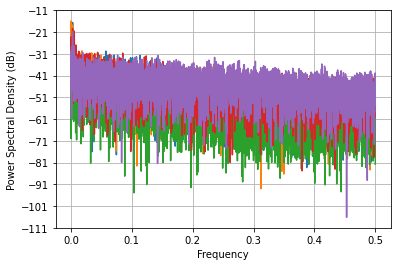

In [315]:
for x in range(len(zawnd.columns)):
    znonan = awndoverall[awndoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zaawnd = acumulative.mean(axis=(0))
zbawnd = bcumulative.mean(axis=(0))
print(a.size)

# TAVG

In [31]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TAVG'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
avgoverall = ultimate.sort_values(by='date')

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


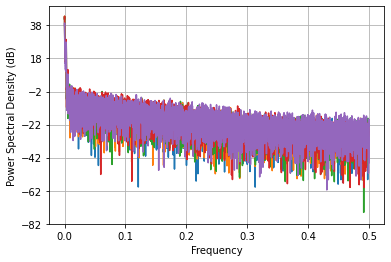

In [316]:
for x in range(len(avgoverall.columns)):
    nonan = avgoverall[avgoverall.columns[x]]
    nonan = nonan.interpolate('linear')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
amean = acumulative.mean(axis=(0))
bmean = bcumulative.mean(axis=(0))

### Detrended

In [318]:
dt = pd.DataFrame()
zmean = pd.DataFrame()
for x in range(len(avgoverall.columns)):
    dtnonan = avgoverall[avgoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zmean = pd.concat([zmean, zscore], axis = 1)
    dt = pd.concat([dt, detrend], axis = 1)

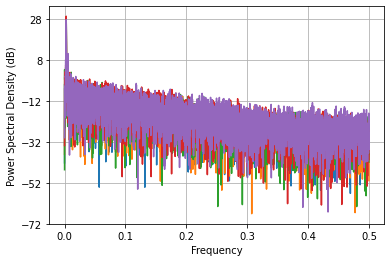

In [319]:
for x in range(len(dt.columns)):
    dtnonan = avgoverall[avgoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtamean = acumulative.mean(axis=(0))
dtbmean = bcumulative.mean(axis=(0))

### Z-Scored

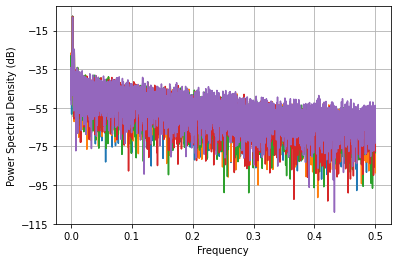

In [320]:
for x in range(len(avgoverall.columns)):
    znonan = avgoverall[avgoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zamean = acumulative.mean(axis=(0))
zbmean = bcumulative.mean(axis=(0))

# TMAX

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

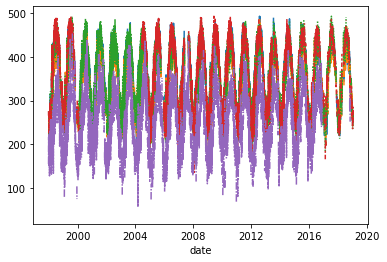

In [37]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TMAX'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
maxoverall = ultimate.sort_values(by='date')
sns.lineplot(data = maxoverall, legend = False)

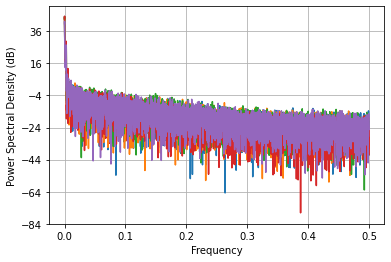

In [38]:
for x in range(len(maxoverall.columns)):
    nonan = maxoverall[maxoverall.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tmaxacumulative = a
        tmaxbcumulative = b
    else:
        tmaxacumulative = np.vstack([tmaxacumulative, a])
        tmaxbcumulative = np.vstack([tmaxbcumulative, b])
tmaxamean = np.nanmean(tmaxacumulative, axis=(0))
tmaxbmean = np.nanmean(tmaxbcumulative, axis=(0))

### Detrended

In [321]:
dttmax = pd.DataFrame()
ztmax = pd.DataFrame()
for x in range(len(maxoverall.columns)):
    dtnonan = maxoverall[maxoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    ztmax = pd.concat([ztmax, zscore], axis = 1)
    dttmax = pd.concat([dttmax, detrend], axis = 1)

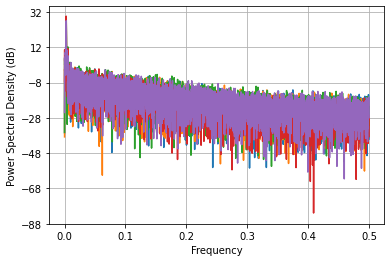

In [323]:
for x in range(len(dttmax.columns)):
    dtnonan = maxoverall[maxoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtatmax = acumulative.mean(axis=(0))
dtbtmax = bcumulative.mean(axis=(0))

### Z-Scored

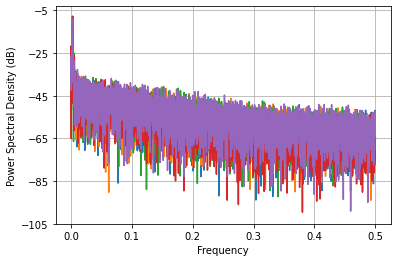

In [324]:
for x in range(len(ztmax.columns)):
    znonan = maxoverall[maxoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zatmax = acumulative.mean(axis=(0))
zbtmax = bcumulative.mean(axis=(0))

# TMIN

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

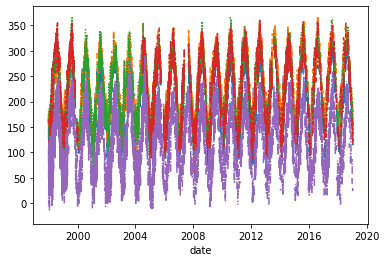

In [42]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'TMIN'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
minoverall = ultimate.sort_values(by='date')
sns.lineplot(data = minoverall, legend = False)

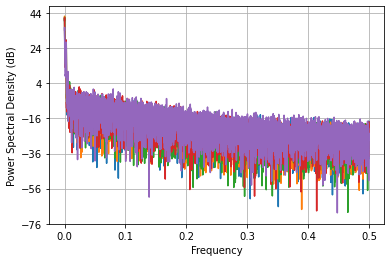

In [43]:
for x in range(len(minoverall.columns)):
    nonan = minoverall[minoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tminacumulative = a
        tminbcumulative = b
    else:
        tminacumulative = np.vstack([tminacumulative, a])
        tminbcumulative = np.vstack([tminbcumulative, b])
tminamean = np.nanmean(tminacumulative, axis=(0))
tminbmean = np.nanmean(tminbcumulative, axis=(0))

### Detrended

In [325]:
dttmin = pd.DataFrame()
ztmin = pd.DataFrame()
for x in range(len(minoverall.columns)):
    dtnonan = minoverall[minoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear', limit_direction = 'both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    ztmin = pd.concat([ztmin, zscore], axis = 1)
    dttmin = pd.concat([dttmin, detrend], axis = 1)

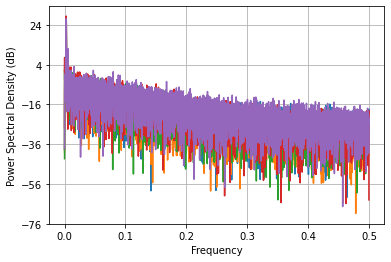

In [326]:
for x in range(len(dt.columns)):
    dtnonan = minoverall[minoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear', limit_direction = 'both')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtamin = acumulative.mean(axis=(0))
dtbmin = bcumulative.mean(axis=(0))

### Z-Scored

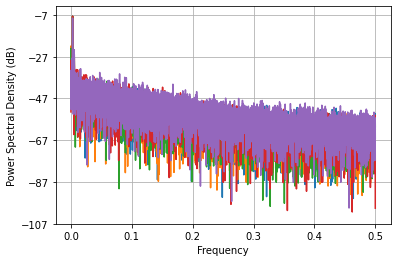

In [328]:
for x in range(len(minoverall.columns)):
    znonan = minoverall[minoverall.columns[x]]
    znonan = znonan.interpolate('linear', limit_direction = 'both')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14)
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zamin = acumulative.mean(axis=(0))
zbmin = bcumulative.mean(axis=(0))

# PRCP

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

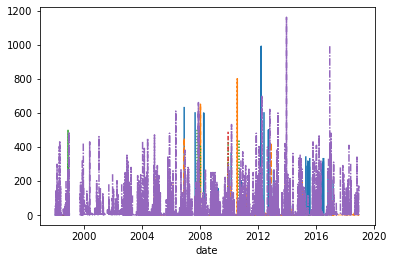

In [48]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'PRCP'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
prcpoverall = ultimate.sort_values(by='date')
sns.lineplot(data = prcpoverall, legend = False)

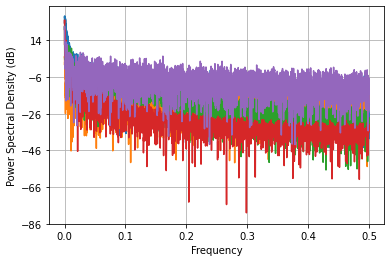

In [49]:
for x in range(len(prcpoverall.columns)):
    nonan = prcpoverall[prcpoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        prcpacumulative = a
        prcpbcumulative = b
    else:
        prcpacumulative = np.vstack([prcpacumulative, a])
        prcpbcumulative = np.vstack([prcpbcumulative, b])
prcpamean = np.nanmean(prcpacumulative, axis=(0))
prcpbmean = np.nanmean(prcpbcumulative, axis=(0))

### Detrended

In [329]:
dtprcp = pd.DataFrame()
zprcp = pd.DataFrame()
for x in range(len(prcpoverall.columns)):
    dtnonan = prcpoverall[prcpoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    zscore = stat.zscore(detrend)
    zscore = pd.DataFrame(zscore)
    zprcp = pd.concat([zprcp, zscore], axis = 1)
    dtprcp = pd.concat([dtprcp, detrend], axis = 1)

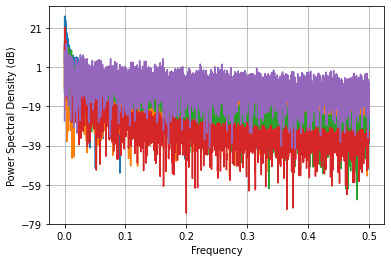

In [330]:
for x in range(len(dt.columns)):
    dtnonan = prcpoverall[prcpoverall.columns[x]]
    dtnonan = dtnonan.interpolate('linear')
    detrend = sig.detrend(dtnonan)
    detrend = pd.DataFrame(detrend)
    a,b = plt.psd(detrend, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
dtaprcp = acumulative.mean(axis=(0))
dtbprcp = bcumulative.mean(axis=(0))

### Z-Scored

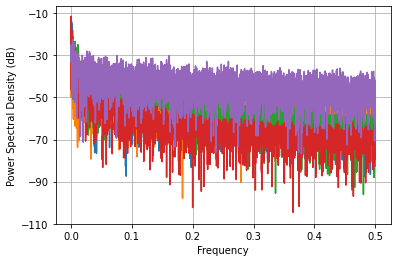

In [331]:
for x in range(len(zprcp.columns)):
    znonan = prcpoverall[prcpoverall.columns[x]]
    znonan = znonan.interpolate('linear')
    zscore = stat.zscore(znonan)
    zscore = pd.DataFrame(zscore)
    a,b = plt.psd(zscore, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
zaprcp = acumulative.mean(axis=(0))
zbprcp = bcumulative.mean(axis=(0))

# Frequency vs. Power Heatmap

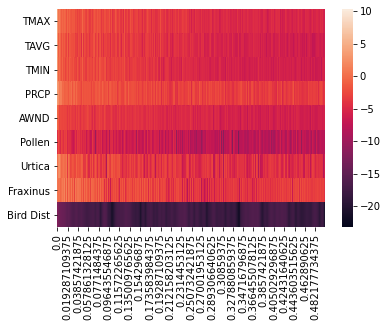

In [205]:
param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
param5 = ['AWND']
param6 = ['Pollen']
param7 = ['Urtica']
param8 = ['Fraxinus']
param9 = ['Bird Dist']

hm1 = pd.DataFrame(data = amean, columns = param1, index = bmean)
hm2 = pd.DataFrame(data = tmaxamean, columns = param2, index = tmaxbmean)
hm3 = pd.DataFrame(data = tminamean, columns = param3, index = tminbmean)
hm4 = pd.DataFrame(data = prcpamean, columns = param4, index = prcpbmean)
hm5 = pd.DataFrame(data = aawndmean, columns = param5, index = bawndmean)
hm6 = pd.DataFrame(data = pollenmeandata, columns = param6, index = pollenmeanindex)
hm7 = pd.DataFrame(data = urticadata, columns = param7, index = urticaindex)
hm8 = pd.DataFrame(data = fraxdata, columns = param8, index = fraxindex)
hm9 = pd.DataFrame(data = distperdaydata, columns = param9, index = distperdayindex)
hm = pd.concat([hm2, hm1, hm3, hm4, hm5, hm6, hm7, hm8, hm9], axis=1)
loghm = np.log(hm)
fig = sns.heatmap(loghm.T)

# Period vs. Power Heatmap

In [206]:
param = ['TMAX', 'TAVG', 'TMIN', 'PRCP', 'AWND', 'Pollen', 'Urtica', 'Fraxinus', 'Bird Dist']
interpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/hm.index[1:],hm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    interpolated = pd.concat([interpolated, series], axis = 1)
    interpolated.rename_axis('frequency')
    interpolated.rename_axis('measurement', axis='columns')
interpolated.columns = param

In [207]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

([<matplotlib.axis.XTick at 0x7ff5653139d0>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

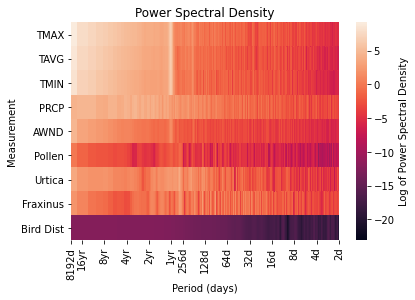

In [208]:
s = sns.heatmap(np.log(interpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

# Detrended

In [332]:
param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
param5 = ['AWND']
param6 = ['Pollen']
param7 = ['Urtica']
param8 = ['Fraxinus']
param9 = ['Bird Dist']

dthm1 = pd.DataFrame(data = dtamean, columns = param1, index = dtbmean)
dthm2 = pd.DataFrame(data = dtatmax, columns = param2, index = dtbtmax)
dthm3 = pd.DataFrame(data = dtamin, columns = param3, index = dtbmin)
dthm4 = pd.DataFrame(data = dtaprcp, columns = param4, index = dtbprcp)
dthm5 = pd.DataFrame(data = dtaawnd, columns = param5, index = dtbawnd)
dthm6 = pd.DataFrame(data = dtapollenmean, columns = param6, index = dtbpollenmean)
dthm7 = pd.DataFrame(data = dtaurtica, columns = param7, index = dtburtica)
dthm8 = pd.DataFrame(data = dtafrax, columns = param8, index = dtbfrax)
dthm9 = pd.DataFrame(data = dtadistperday, columns = param9, index = dtbdistperday)
dthm = pd.concat([dthm2, dthm1, dthm3, dthm4, dthm5, dthm6, dthm7, dthm8, dthm9], axis=1)
dtloghm = np.log(dthm)

In [157]:
param = ['TMAX', 'TAVG', 'TMIN', 'PRCP', 'AWND', 'Pollen', 'Urtica', 'Fraxinus']
dtinterpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/dthm.index[1:],dthm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    dtinterpolated = pd.concat([dtinterpolated, series], axis = 1)
    dtinterpolated.rename_axis('frequency')
    dtinterpolated.rename_axis('measurement', axis='columns')
dtinterpolated.columns = param

In [158]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

([<matplotlib.axis.XTick at 0x7ff54219ac70>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

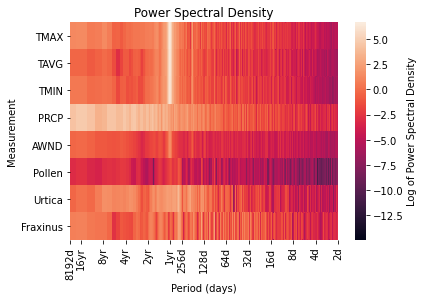

In [159]:
s = sns.heatmap(np.log(dtinterpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap y-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels

# Z-scored

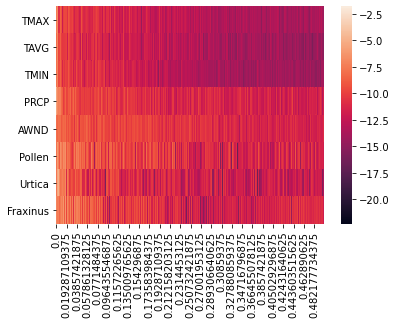

In [160]:
param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
param5 = ['AWND']
param6 = ['Pollen']
param7 = ['Urtica']
param8 = ['Fraxinus']

zhm1 = pd.DataFrame(data = zamean, columns = param1, index = zbmean)
zhm2 = pd.DataFrame(data = zatmax, columns = param2, index = zbtmax)
zhm3 = pd.DataFrame(data = zamin, columns = param3, index = zbmin)
zhm4 = pd.DataFrame(data = zaprcp, columns = param4, index = zbprcp)
zhm5 = pd.DataFrame(data = zaawnd, columns = param5, index = zbawnd)
zhm6 = pd.DataFrame(data = zapollenmean, columns = param6, index = zbpollenmean)
zhm7 = pd.DataFrame(data = zaurtica, columns = param7, index = zburtica)
zhm8 = pd.DataFrame(data = zafrax, columns = param8, index = zbfrax)
zhm = pd.concat([zhm2, zhm1, zhm3, zhm4, zhm5, zhm6, zhm7, zhm8], axis=1)
zloghm = np.log(zhm)
zfig = sns.heatmap(zloghm.T)

In [161]:
param = ['TMAX', 'TAVG', 'TMIN', 'PRCP', 'AWND', 'Pollen', 'Urtica', 'Fraxinus']
zinterpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/zhm.index[1:],zhm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(1,13, num = 8193, endpoint = True)
    xvalues = xvalues[::-1]
    xvalues = 2**xvalues
    interparray = base(xvalues)
    series = pd.Series(interparray, index = xvalues)
    zinterpolated = pd.concat([zinterpolated, series], axis = 1)
    zinterpolated.rename_axis('frequency')
    zinterpolated.rename_axis('measurement', axis='columns')
zinterpolated.columns = param

In [162]:
yvalues = np.array(range(0,8193)) #y-values
xtickmarkloc = [2, 4, 8, 16, 32, 64, 128, 256, 365, 365*2, 365*4, 365*8, 365*16, 8192] #setting the xtickmark locations (numbers represent the period in days)

x = xvalues #the x-values to interpolate along??
y = yvalues #the y-values to interpolate along??
f = sci.interpolate.interp1d(x, y) #interpolating 
xnew = xtickmarkloc #the desired x-values
ynew = f(xnew) #list of values

([<matplotlib.axis.XTick at 0x7ff543a1a880>,
 [Text(8192.0, 0, '2d'),
  Text(7509.333446156619, 0, '4d'),
  Text(6826.666779477225, 0, '8d'),
  Text(6144.0, 0, '16d'),
  Text(5461.333446156619, 0, '32d'),
  Text(4778.666779477225, 0, '64d'),
  Text(4096.0, 0, '128d'),
  Text(3413.3334461566187, 0, '256d'),
  Text(3063.9768665044767, 0, '1yr'),
  Text(2381.3102969966953, 0, '2yr'),
  Text(1698.6436381508265, 0, '4yr'),
  Text(1015.9768665044764, 0, '8yr'),
  Text(333.31029699669557, 0, '16yr'),
  Text(0.0, 0, '8192d')])

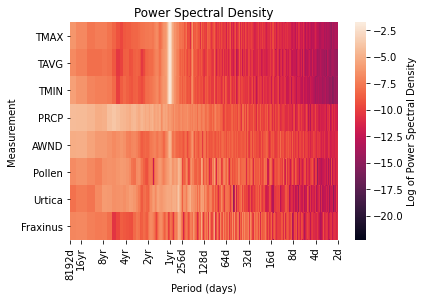

In [163]:
s = sns.heatmap(np.log(zinterpolated.T), cbar_kws={'label': 'Log of Power Spectral Density'}) #creating the heatmap and labeling the color bar
s.set_title('Power Spectral Density') #setting the heatmap title
s.set_xlabel('Period (days)') #setting the heatmap x-axis label
s.set_ylabel('Measurement') #setting the heatmap x-axis label
newlabel = ['2d', '4d','8d','16d','32d','64d','128d','256d','1yr', '2yr', '4yr', '8yr', '16yr', '8192d'] #setting the x-axis labels
plt.xticks(ynew, newlabel) #plotting the x-ticks and the newlabels